In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = np.genfromtxt("longley.csv",delimiter=",")
print(data)

[[     nan      nan      nan      nan      nan      nan      nan      nan]
 [     nan   83.     234.289  235.6    159.     107.608 1947.      60.323]
 [     nan   88.5    259.426  232.5    145.6    108.632 1948.      61.122]
 [     nan   88.2    258.054  368.2    161.6    109.773 1949.      60.171]
 [     nan   89.5    284.599  335.1    165.     110.929 1950.      61.187]
 [     nan   96.2    328.975  209.9    309.9    112.075 1951.      63.221]
 [     nan   98.1    346.999  193.2    359.4    113.27  1952.      63.639]
 [     nan   99.     365.385  187.     354.7    115.094 1953.      64.989]
 [     nan  100.     363.112  357.8    335.     116.219 1954.      63.761]
 [     nan  101.2    397.469  290.4    304.8    117.388 1955.      66.019]
 [     nan  104.6    419.18   282.2    285.7    118.734 1956.      67.857]
 [     nan  108.4    442.769  293.6    279.8    120.445 1957.      68.169]
 [     nan  110.8    444.546  468.1    263.7    121.95  1958.      66.513]
 [     nan  112.6    482.

In [11]:
x_data = data[1:,2:]
y_data = data[1:,1]
x_data = np.insert(x_data,0,values=np.ones(len(x_data)),axis = 1)
print(x_data)
print(y_data)

[[1.00000e+00 2.34289e+02 2.35600e+02 1.59000e+02 1.07608e+02 1.94700e+03
  6.03230e+01]
 [1.00000e+00 2.59426e+02 2.32500e+02 1.45600e+02 1.08632e+02 1.94800e+03
  6.11220e+01]
 [1.00000e+00 2.58054e+02 3.68200e+02 1.61600e+02 1.09773e+02 1.94900e+03
  6.01710e+01]
 [1.00000e+00 2.84599e+02 3.35100e+02 1.65000e+02 1.10929e+02 1.95000e+03
  6.11870e+01]
 [1.00000e+00 3.28975e+02 2.09900e+02 3.09900e+02 1.12075e+02 1.95100e+03
  6.32210e+01]
 [1.00000e+00 3.46999e+02 1.93200e+02 3.59400e+02 1.13270e+02 1.95200e+03
  6.36390e+01]
 [1.00000e+00 3.65385e+02 1.87000e+02 3.54700e+02 1.15094e+02 1.95300e+03
  6.49890e+01]
 [1.00000e+00 3.63112e+02 3.57800e+02 3.35000e+02 1.16219e+02 1.95400e+03
  6.37610e+01]
 [1.00000e+00 3.97469e+02 2.90400e+02 3.04800e+02 1.17388e+02 1.95500e+03
  6.60190e+01]
 [1.00000e+00 4.19180e+02 2.82200e+02 2.85700e+02 1.18734e+02 1.95600e+03
  6.78570e+01]
 [1.00000e+00 4.42769e+02 2.93600e+02 2.79800e+02 1.20445e+02 1.95700e+03
  6.81690e+01]
 [1.00000e+00 4.44546

In [12]:
def Ridge(xArr , yArr , lam):
    xTx = np.dot(xArr.T , xArr)
    temp  = xTx + lam * np.eye(len(xTx))
    temp1 = np.dot(np.linalg.inv(temp),xArr.T)
    theta = np.dot(temp1 , yArr)
    return theta

In [13]:
theta = Ridge(x_data , y_data , 0.1)

In [14]:
theta = theta[:,np.newaxis]

In [15]:
theta.shape

(7, 1)

In [20]:
np.dot(x_data , theta).shape

(16, 1)

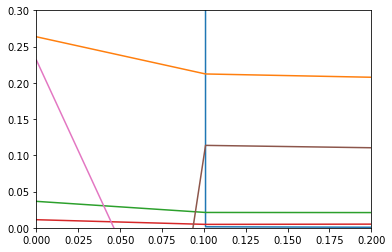

'随着 的增大，各元素 的绝对值均趋于不断变小，它们相对于正确值 的偏差也越来越大。 \n趋于无穷大时， 趋于0。其中， 随 的改变而变化的轨迹，就称为岭迹。实际计算中可选非常多的 值，\n做出一个岭迹图，看看这个图在取哪个值的时候变稳定了，那就确定 值了。'

In [66]:
a = np.linspace(0,10,100)
plt.figure()
plt.xlim(0,0.2)
plt.ylim(0,0.3)
y = np.ones((7,100))
for i in range(100):
    y[:,i] = Ridge(x_data , y_data , a[i])
for i in range(7):
    plt.plot(a , y[i,:])
plt.show()
"""随着 的增大，各元素 的绝对值均趋于不断变小，它们相对于正确值 的偏差也越来越大。 
趋于无穷大时， 趋于0。其中， 随 的改变而变化的轨迹，就称为岭迹。实际计算中可选非常多的 值，
做出一个岭迹图，看看这个图在取哪个值的时候变稳定了，那就确定 值了。"""
#由图可知 lam为0.1时 各参数区域稳定 ，则lam = 0.1 是最佳值


In [67]:
y_data = y_data[:,np.newaxis]

In [68]:
temp = np.zeros((16,100))
for i in range(100):
    temp[:,i] = y_data[:,0] - np.dot(x_data , y[:,i])
print(temp)

[[-0.6008158  -0.51544822 -0.55144411 ... -1.30284649 -1.30482437
  -1.30677256]
 [ 1.55027299  1.56628813  1.57426365 ...  1.66550508  1.66555251
   1.66559834]
 [ 0.10322849  0.10969797  0.10266298 ... -0.0322287  -0.03256124
  -0.03288887]
 ...
 [ 0.2710213   0.20648745  0.21662628 ...  0.48235604  0.48320125
   0.48403459]
 [ 0.19785669  0.42608186  0.40106698 ... -0.16470777 -0.16630658
  -0.16788187]
 [-0.64028248 -0.71266188 -0.74340379 ... -1.75590869 -1.75952039
  -1.76308214]]


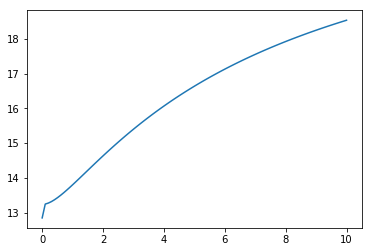

In [70]:
error2 = np.zeros(100)
for j in range(100):
    for i in range(16):
        error2[j] += temp[i,j]**2
plt.plot(a , error2)
plt.show()

In [72]:
error2

array([12.8440023 , 13.24312391, 13.27165941, 13.31403463, 13.36714003,
       13.42857422, 13.49646393, 13.56933468, 13.64601656, 13.72557481,
       13.80725799, 13.89045878, 13.9746842 , 14.05953256, 14.14467569,
       14.22984489, 14.3148199 , 14.39942015, 14.48349771, 14.56693161,
       14.64962327, 14.73149274, 14.81247567, 14.89252071, 14.97158749,
       15.04964484, 15.12666937, 15.20264423, 15.27755811, 15.35140437,
       15.42418032, 15.49588661, 15.56652668, 15.63610636, 15.70463343,
       15.77211735, 15.83856897, 15.90400025, 15.96842412, 16.03185423,
       16.09430488, 16.15579082, 16.21632718, 16.27592935, 16.33461292,
       16.39239358, 16.44928709, 16.50530919, 16.5604756 , 16.61480196,
       16.66830376, 16.7209964 , 16.77289508, 16.82401482, 16.87437045,
       16.92397658, 16.9728476 , 17.02099767, 17.06844069, 17.11519034,
       17.16126004, 17.20666295, 17.25141198, 17.29551981, 17.33899884,
       17.38186123, 17.42411889, 17.46578346, 17.50686637, 17.54

In [55]:
a = np.linspace(0,10,100)
a

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [28]:
y_data = y_data[:,np.newaxis]

In [31]:
np.sum((y_data - np.dot(x_data , theta))**2)

13.24292125530737

(16, 16)